# Random Forest Model 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
 

In [3]:
df = pd.read_csv("../Biomass_data/processed/after_eda.csv")
df.head()

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


We are going to ignore the images for now.

In [4]:
df = df.drop(columns = ['sample_id' , 'image_path'] , axis= 1)
df.head(10)

,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750
5,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Clover_g,0.0000
6,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Dead_g,0.0000
7,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Green_g,7.6000
8,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Total_g,7.6000
9,2015/4/1,NSW,Lucerne,0.55,16.0000,GDM_g,7.6000


In [5]:
df['Sampling_Date'] = pd.to_datetime(df['Sampling_Date'])
df["Sampling_Date"].unique()

<DatetimeArray>
['2015-09-04 00:00:00', '2015-04-01 00:00:00', '2015-09-01 00:00:00',
 '2015-05-18 00:00:00', '2015-09-11 00:00:00', '2015-09-30 00:00:00',
 '2015-07-02 00:00:00', '2015-06-30 00:00:00', '2015-05-19 00:00:00',
 '2015-09-29 00:00:00', '2015-01-15 00:00:00', '2015-06-26 00:00:00',
 '2015-11-09 00:00:00', '2015-02-24 00:00:00', '2015-08-19 00:00:00',
 '2015-06-29 00:00:00', '2015-05-07 00:00:00', '2015-08-14 00:00:00',
 '2015-08-21 00:00:00', '2015-08-18 00:00:00', '2015-07-01 00:00:00',
 '2015-11-10 00:00:00', '2015-10-13 00:00:00', '2015-10-06 00:00:00',
 '2015-02-25 00:00:00', '2015-10-14 00:00:00', '2015-09-03 00:00:00',
 '2015-07-08 00:00:00']
Length: 28, dtype: datetime64[ns]

I'll only use month and day because the pictures are all from the same year different months.

In [6]:
df['day_of_year'] = df['Sampling_Date'].dt.dayofyear

In [7]:
df = df.drop(["Sampling_Date"], axis=1)
df.head()

,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target,day_of_year
0,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000,247
1,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984,247
2,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751,247
3,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735,247
4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750,247


In [8]:
df.describe()

,Pre_GSHH_NDVI,Height_Ave_cm,target,day_of_year
count,1740.000000,1740.000000,1740.000000,1740.000000
mean,0.660259,7.634387,25.035095,197.790230
std,0.148449,9.790619,25.994424,82.029597
min,0.280000,1.000000,0.000000,15.000000
25%,0.560000,3.000000,5.008875,139.000000
50%,0.690000,4.000000,18.467550,183.000000
75%,0.770000,7.000000,36.100000,258.500000
max,0.880000,52.000000,185.700000,314.000000


In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

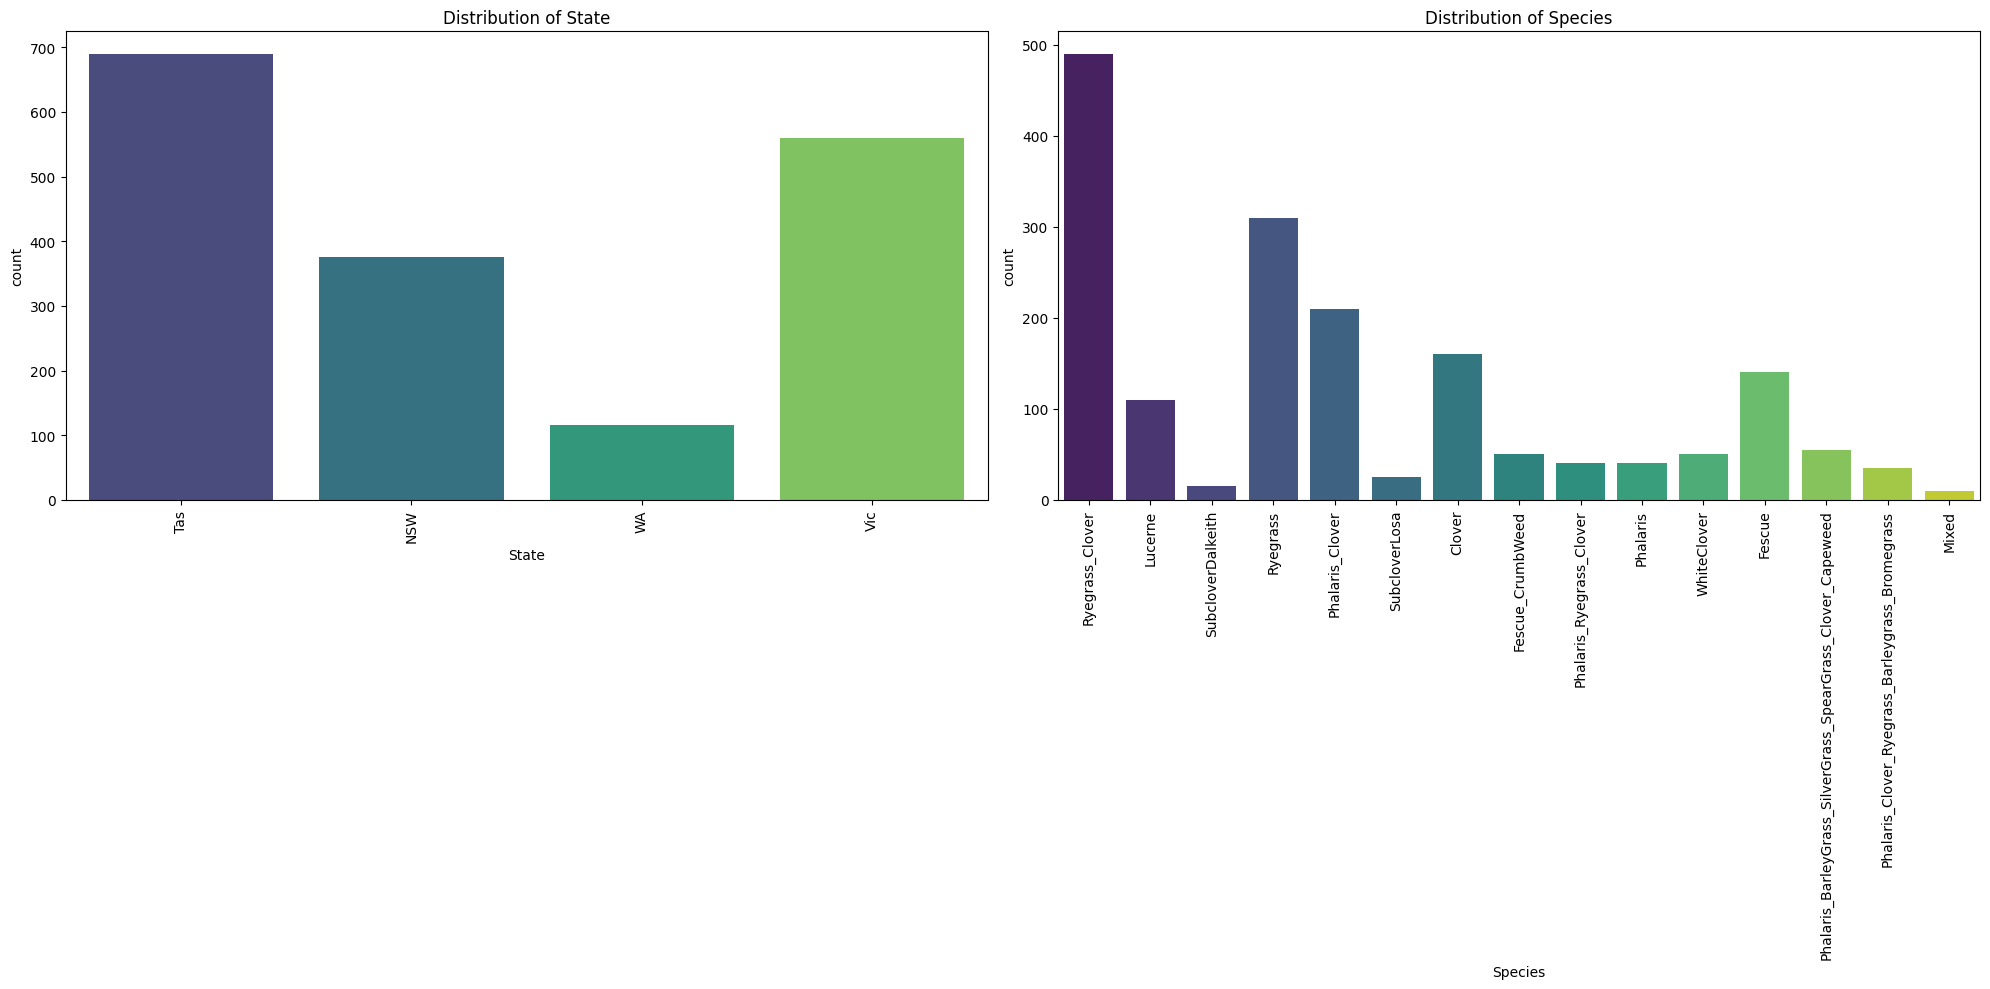

In [10]:
features = ['State', 'Species']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i, col in enumerate(features):
    sns.countplot(data=df, x=col, ax=axes[i] , palette= "viridis")
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [11]:
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])
df["Species"] = le.fit_transform(df['Species'])

In [12]:
df.head()

,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target,day_of_year
0,1,11,0.62,4.6667,Dry_Clover_g,0.0000,247
1,1,11,0.62,4.6667,Dry_Dead_g,31.9984,247
2,1,11,0.62,4.6667,Dry_Green_g,16.2751,247
3,1,11,0.62,4.6667,Dry_Total_g,48.2735,247
4,1,11,0.62,4.6667,GDM_g,16.2750,247


In [13]:
df_dryclover = df.loc[df['target_name'] == 'Dry_Clover_g']
df_drydead = df.loc[df['target_name'] == 'Dry_Dead_g']
df_drygreen =df.loc[df['target_name'] == 'Dry_Green_g']
df_gdm =df.loc[df['target_name'] == 'GDM_g']

In [14]:
dataframes = {"df_dryclover" : df_dryclover , "df_drydead" : df_drydead , "df_drygreen" : df_drygreen , "df_gdm" : df_gdm}
for df in dataframes.values() :
    df.reset_index(drop=True, inplace=True)
    df.drop(['target_name'] , axis = 1 , inplace = True)

In [18]:
splited_df = {}


In [19]:
def split_train_test(df, splited_df, df_name):
    X = df.drop("target", axis=1)
    y = df["target"]
    X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42)

    splited_df[df_name] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }


In [20]:
for df_name , df in dataframes.items() : 
    split_train_test(df,splited_df ,df_name)

In [28]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
results_list = []

for name, data in splited_df.items():
    rf_regressor.fit(data['X_train'], data['y_train'])
    
    y_pred = rf_regressor.predict(data['X_test'])
    train_pred = rf_regressor.predict(data['X_train']) 

    y_mse = mean_squared_error(data['y_test'], y_pred)
    y_r2 = r2_score(data['y_test'], y_pred)
    
    train_mse = mean_squared_error(data['y_train'], train_pred)
    train_r2 = r2_score(data['y_train'], train_pred)

    results_list.append({
        "Dataset": name,
        "Test MSE": y_mse,
        "Test R2": y_r2,
        "Train MSE": train_mse,
        "Train R2": train_r2
    })

results_df = pd.DataFrame(results_list)
display(results_df)

,Dataset,Test MSE,Test R2,Train MSE,Train R2
0,df_dryclover,69.825508,0.552443,5.466780,0.959592
1,df_drydead,100.273044,0.382681,12.571790,0.916132
2,df_drygreen,177.723825,0.769747,18.394484,0.969592
3,df_gdm,163.902249,0.779162,19.798470,0.966561
